In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pd.read_excel('final_input_df.xlsx')
df = df.fillna(method = 'ffill')
df = df.replace('--', np.nan)

columns = df.columns.tolist()
for i in range(len(columns)):
    df[columns[i]] = df.groupby(['Countries'])[columns[i]].apply(lambda x: x.ffill())
    
df = df.dropna()
data = df.iloc[:, 7:].values
scalar = MinMaxScaler()
model = scalar.fit(data)
scaled_data = model.transform(data)
df.iloc[:, 7:] = scaled_data

X = df.iloc[:, 6:-1]
y = df['Outcome']
model = sm.OLS(y,sm.add_constant(X)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     564.3
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:50:31   Log-Likelihood:                 27631.
No. Observations:                8292   AIC:                        -5.522e+04
Df Residuals:                    8270   BIC:                        -5.506e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                              0.0017      0.003      0.500      0.617      -0.005       0.008
Crisis                                                            -0.0012      0.000     -2.378      0.017      -0.002      -0.000
Gross domestic product, constant prices                            0.0128      0.003      4.005      0.000       0.007       0.019
Output gap in percent of potential GDP                            -0.0022      0.002     -1.012      0.312      -0.006       0.002
Implied PPP conversion rate                                       -0.0001      0.001     -0.153      0.878      -0.002       0.002
Total investment                                               -2.443e-05      0.002     -0.011      0.992      -0.005       0.004
Gross national savings                                            -0.0067      0.005     -1.426      0.154      -0.016       0.003
Inflation, average consumer prices                                 0.6437      0.006    108.424      0.000       0.632       0.655
Volume of imports of goods and services                            0.0012      0.004      0.333      0.739      -0.006       0.008
Volume of exports of goods and services                           -0.0060      0.004     -1.574      0.116      -0.014       0.001
Unemployment rate                                                 -0.0005      0.001     -0.404      0.686      -0.003       0.002
General government gross debt                                     -0.0011      0.002     -0.697      0.486      -0.004       0.002
Current account balance                                           -0.0039      0.004     -0.901      0.368      -0.012       0.005
Commodity Export Price Index                                       0.0010      0.001      0.857      0.392      -0.001       0.003
Commodity Import Price Index                                    5.263e-06      0.001      0.005      0.996      -0.002       0.002
Consumer Price Index, All items                                   -0.0034      0.001     -3.053      0.002      -0.006      -0.001
Financial, Interest Rates, Money Market, Percent per annum        -0.1728      0.008    -22.363      0.000      -0.188      -0.158
Cyclically adjusted balance (% of potential GDP)                  -0.0002      0.001     -0.130      0.896      -0.003       0.002
Official Reserve Assets, Foreign Currency Reserves, US Dollars     0.0004      0.001      0.498      0.619      -0.001       0.002
Corporate Income Tax Revenue in Percent of GDP                     0.0032      0.002      2.072      0.038       0.000       0.006
Goods and Services Tax Revenue in Percent of GDP                   0.0

In [2]:
reg = Lasso(alpha=1e-5, fit_intercept=True)
reg.fit(X, y)

Lasso(alpha=1e-05)

In [3]:
reg.coef_

array([-1.20267594e-03,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  5.92972541e-01,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.02783480e-04,  0.00000000e+00, -2.09690974e-03, -9.70115809e-02,
        0.00000000e+00,  0.00000000e+00,  1.07569240e-03,  0.00000000e+00,
        2.29314222e-04])

In [4]:
reg.intercept_

-0.003909925238794814

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pd.read_excel('final_input_df.xlsx')
df = df.fillna(method = 'ffill')
df = df.replace('--', np.nan)

columns = df.columns.tolist()
for i in range(len(columns)):
    df[columns[i]] = df.groupby(['Countries'])[columns[i]].apply(lambda x: x.ffill())
    
df = df.dropna()
data = df.iloc[:, 7:].values
scalar = StandardScaler()
model = scalar.fit(data)
scaled_data = model.transform(data)
df.iloc[:, 7:] = scaled_data

X = df.iloc[:, 6:-1]
y = df['Outcome']
model = sm.OLS(y,sm.add_constant(X)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     564.3
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:50:35   Log-Likelihood:                -8079.5
No. Observations:                8292   AIC:                         1.620e+04
Df Residuals:                    8270   BIC:                         1.636e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                              0.0035      0.007      0.482      0.630      -0.011       0.018
Crisis                                                            -0.0859      0.036     -2.378      0.017      -0.157      -0.015
Gross domestic product, constant prices                            0.0322      0.008      4.005      0.000       0.016       0.048
Output gap in percent of potential GDP                            -0.0077      0.008     -1.012      0.312      -0.023       0.007
Implied PPP conversion rate                                       -0.0011      0.007     -0.153      0.878      -0.015       0.013
Total investment                                               -9.863e-05      0.009     -0.011      0.992      -0.018       0.018
Gross national savings                                            -0.0170      0.012     -1.426      0.154      -0.040       0.006
Inflation, average consumer prices                                 0.7860      0.007    108.424      0.000       0.772       0.800
Volume of imports of goods and services                            0.0026      0.008      0.333      0.739      -0.013       0.018
Volume of exports of goods and services                           -0.0127      0.008     -1.574      0.116      -0.029       0.003
Unemployment rate                                                 -0.0031      0.008     -0.404      0.686      -0.018       0.012
General government gross debt                                     -0.0057      0.008     -0.697      0.486      -0.022       0.010
Current account balance                                           -0.0098      0.011     -0.901      0.368      -0.031       0.012
Commodity Export Price Index                                       0.0064      0.007      0.857      0.392      -0.008       0.021
Commodity Import Price Index                                    3.458e-05      0.008      0.005      0.996      -0.015       0.015
Consumer Price Index, All items                                   -0.0229      0.007     -3.053      0.002      -0.038      -0.008
Financial, Interest Rates, Money Market, Percent per annum        -0.1618      0.007    -22.363      0.000      -0.176      -0.148
Cyclically adjusted balance (% of potential GDP)                  -0.0010      0.008     -0.130      0.896      -0.016       0.014
Official Reserve Assets, Foreign Currency Reserves, US Dollars     0.0039      0.008      0.498      0.619      -0.012       0.019
Corporate Income Tax Revenue in Percent of GDP                     0.0159      0.008      2.072      0.038       0.001       0.031
Goods and Services Tax Revenue in Percent of GDP                   0.0

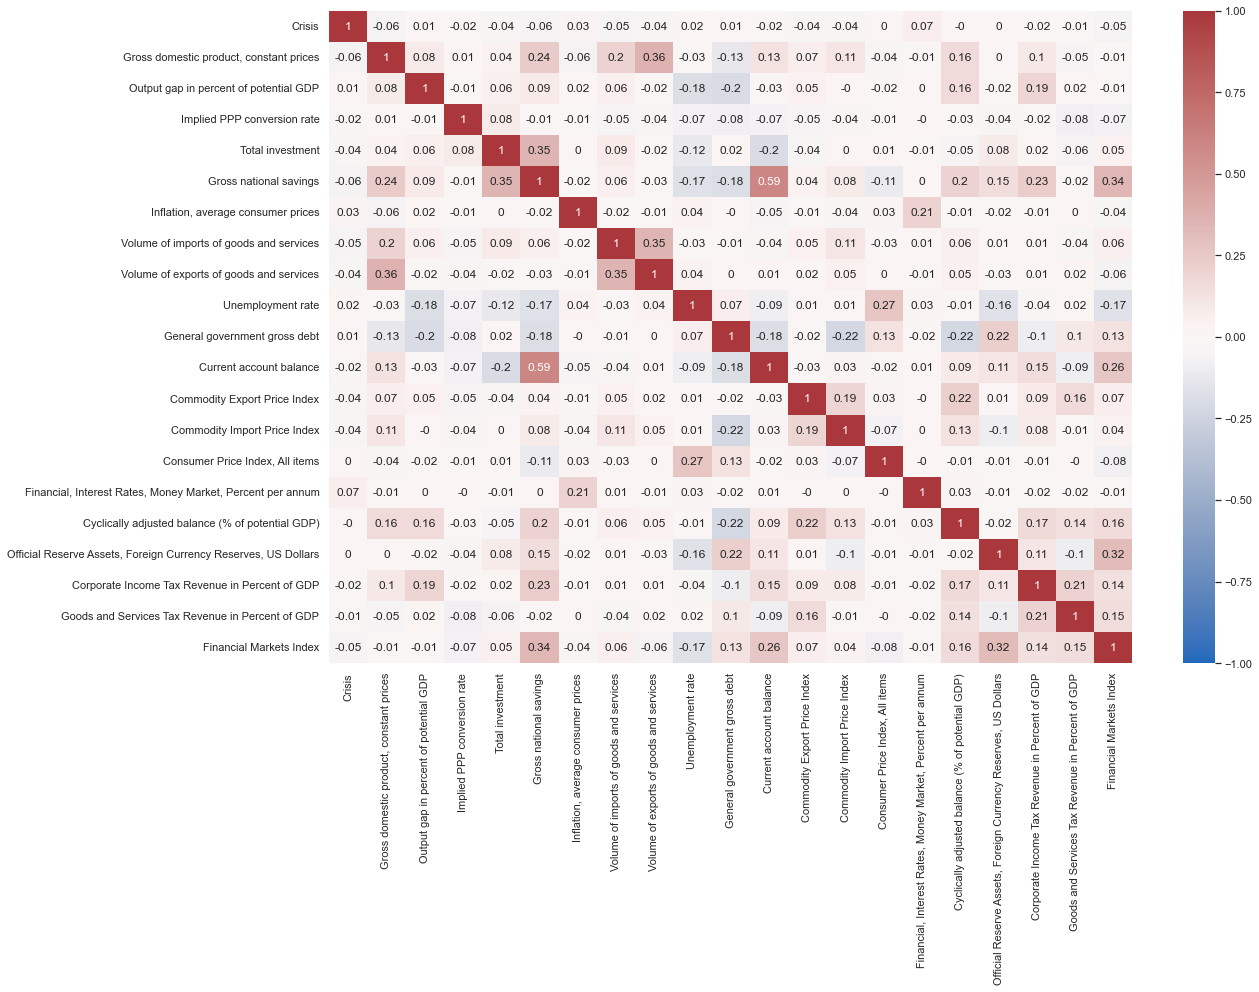

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(np.round(df.iloc[:,6:-1].corr(),2), cmap='vlag', vmin = -1, vmax = 1, annot=True)
plt.savefig('corr.pdf')

In [7]:
reg = Lasso(alpha=1e-3, fit_intercept=True)
reg.fit(X, y)

Lasso(alpha=0.001)

In [8]:
reg.coef_

array([-0.06057695,  0.03031101, -0.00592046, -0.        , -0.        ,
       -0.01465796,  0.78445969,  0.00126786, -0.01043568, -0.00219724,
       -0.00352809, -0.00900905,  0.00572352,  0.        , -0.02223092,
       -0.16086281, -0.        ,  0.00263616,  0.01481575,  0.00518824,
        0.01111073])

In [9]:
reg.intercept_

0.0024473319762332597